# Ad-Hoc Reporting

Utilize your `sqlite3` and `pandas` knowledge to query your database and generate visualizations! 

After completing your report, answer the 4 analytical questions below. Remember that we expect comprehensive numerical detail! 

In [70]:
import sqlite3

import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
# TODO: Set up a connection the "Market.db" database
conn = sqlite3.connect("db/Market.db")

# TODO: Set up the cursor
cursor  = conn.cursor()

### Question 1 : Total Products Less than €10

How many products in our Products table cost less than 10 EUR?

**Hint**: You can apply an aggregate function to an entire table.

In [72]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
SELECT COUNT(ProductName) FROM Products WHERE Price <10 ; 
""" )

rows = cursor.fetchall()
print(rows)

[(11,)]


### Question 2 : Most Frequent Country by Supplier

What is the most common country of origin in our Suppliers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [73]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
SELECT Count(Country), Country FROM Suppliers GROUP BY (Country) ORDER BY Country DESC;
""")

# TODO: Fetch your list of tuples and print it out
Nrow = cursor.fetchall()
print(Nrow)

[(4, 'USA'), (2, 'UK'), (2, 'Sweden'), (1, 'Spain'), (1, 'Singapore'), (1, 'Norway'), (1, 'Netherlands'), (2, 'Japan'), (2, 'Italy'), (3, 'Germany'), (3, 'France'), (1, 'Finland'), (1, 'Denmark'), (2, 'Canada'), (1, 'Brazil'), (2, 'Australia')]


/var/folders/gm/fpwr86zs1p96z8j61ggn1ghm0000gn/T/ipykernel_38435/1061295857.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x= 'Country', y = 'Supplier Count', palette = 'pastel')


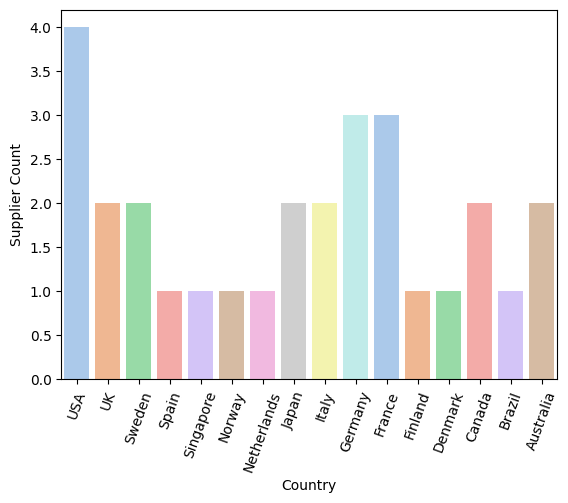

In [161]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(Nrow, columns=['Supplier Count', 'Country'])

# TODO: Generate a visualization on this dataframe
df.head(30)
sns.barplot(data = df, x= 'Country', y = 'Supplier Count', palette = 'pastel')
plt.xticks(rotation = 70)
plt.show()

### Question 3 : Most Frequent Country by Customer

What is the most common country of origin in our Customers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [75]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT COUNT(Country), Country
    FROM Customers 
    GROUP BY Country
    ORDER BY COUNT(Country) DESC;
""")

# TODO: Fetch your list of tuples and print it out
Arow = cursor.fetchall()
print(Arow)

[(13, 'USA'), (11, 'Germany'), (11, 'France'), (9, 'Brazil'), (7, 'UK'), (5, 'Spain'), (5, 'Mexico'), (4, 'Venezuela'), (3, 'Italy'), (3, 'Canada'), (3, 'Argentina'), (2, 'Switzerland'), (2, 'Sweden'), (2, 'Portugal'), (2, 'Finland'), (2, 'Denmark'), (2, 'Belgium'), (2, 'Austria'), (1, 'Poland'), (1, 'Norway'), (1, 'Ireland')]


/var/folders/gm/fpwr86zs1p96z8j61ggn1ghm0000gn/T/ipykernel_38435/1302267344.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x= 'Country Name', y = 'Country Count', palette = 'pastel')


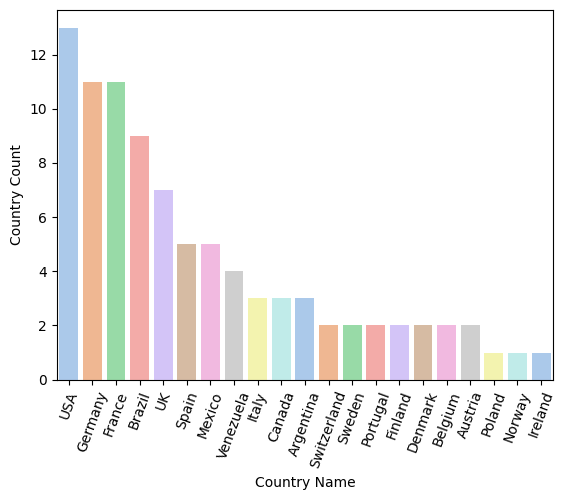

In [160]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(Arow, columns=['Country Count', 'Country Name'])

# TODO: Generate a visualization on this dataframe
sns.barplot(data = df, x= 'Country Name', y = 'Country Count', palette = 'pastel')
plt.xticks(rotation = 70)
plt.show()

### Question 4 : Least Popular Products by Quantity

What are the least popular products by order quantity? Limit your output to the bottom 20 products. Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [77]:
# TODO: Write a SQL query which will answer the question above.
# Least products by order
cursor.execute("""
    SELECT p.ProductName, SUM(o.Quantity) TotalOrdered
    FROM OrderDetails AS o
    LEFT JOIN Products AS p ON o.ProductID = p.ProductID
    GROUP BY p.ProductID
    ORDER BY TotalOrdered ASC
    LIMIT 20;
""")

# TODO: Fetch your list of tuples and print it out
Brow = cursor.fetchall()
print(Brow)

[('Laughing Lumberjack Lager', 5), ('Røgede sild', 15), ("Gustaf's Knäckebröd", 18), ('Mishi Kobe Niku', 20), ("Uncle Bob's Organic Dried Pears", 25), ('Genen Shouyu', 25), ('Queso Manchego La Pastora', 27), ("Grandma's Boysenberry Spread", 36), ('Gravad lax', 39), ('Röd Kaviar', 45), ('Filo Mix', 48), ('Mascarpone Fabioli', 52), ('Chocolade', 70), ('Valkoinen suklaa', 70), ('NuNuCa Nuß-Nougat-Creme', 71), ('Singaporean Hokkien Fried Mee', 77), ('Aniseed Syrup', 80), ('Ikura', 85), ('Schoggi Schokolade', 90), ('Louisiana Hot Spiced Okra', 90)]


/var/folders/gm/fpwr86zs1p96z8j61ggn1ghm0000gn/T/ipykernel_38435/2708871094.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x= 'Product', y = 'Count', palette = 'pastel')


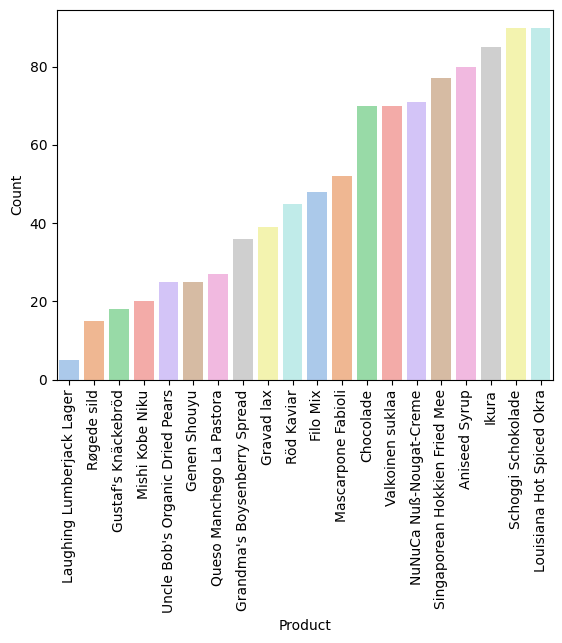

In [159]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(Brow, columns=['Product','Count' ])

# TODO: Generate a visualization on this dataframe
sns.barplot(data = df, x= 'Product', y = 'Count', palette = 'pastel')
plt.xticks(rotation = 90)
plt.show()

### Question 5 : Least Popular Products by Revenue

What are the least popular products by **total revenue** (order quantity * price)? Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [ ]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT p.ProductName, Sum(Quantity * Price) AS TotalRevenue FROM OrderDetails AS o
    LEFT JOIN Products AS p ON o.ProductID = p.ProductID
    GROUP BY o.ProductID ORDER BY TotalRevenue ASC
    LIMIT 30;
""")
# TODO: Fetch your list of tuples and print it out
rowss = cursor.fetchall()
print(rowss)

[('Laughing Lumberjack Lager', 70), ('Røgede sild', 142.5), ('Filo Mix', 336), ("Gustaf's Knäckebröd", 378), ('Genen Shouyu', 387.5), ('Konbu', 552), ('Röd Kaviar', 675), ('Guaraná Fantástica', 711.0), ("Uncle Bob's Organic Dried Pears", 750), ('Geitost', 790.0), ('Aniseed Syrup', 800), ('Chocolade', 892.5), ("Grandma's Boysenberry Spread", 900), ('Zaanse koeken', 959.5), ('NuNuCa Nuß-Nougat-Creme', 994), ('Gravad lax', 1014), ('Queso Manchego La Pastora', 1026), ('Singaporean Hokkien Fried Mee', 1078), ('Rhönbräu Klosterbier', 1116.0), ('Valkoinen suklaa', 1137.5), ("Jack's New England Clam Chowder", 1341.35), ('Original Frankfurter grüne Soße', 1404), ("Sir Rodney's Scones", 1470), ('Tunnbröd', 1485), ('Louisiana Hot Spiced Okra', 1530), ('Sasquatch Ale', 1540), ('Mascarpone Fabioli', 1664), ('Teatime Chocolate Biscuits', 1665.2), ('Spegesild', 1740), ('Longlife Tofu', 1860)]


/var/folders/gm/fpwr86zs1p96z8j61ggn1ghm0000gn/T/ipykernel_38435/4234480302.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = 'Product', y = 'Quantity', palette = 'pastel')


Text(0, 0.5, 'Total Revenue')

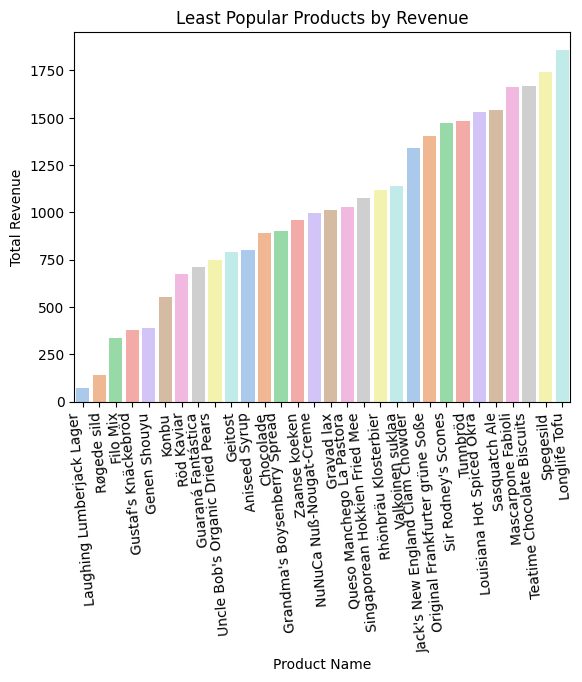

In [162]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rowss, columns= ['Product', 'Quantity'])

# TODO: Generate a visualization on this dataframe
sns.barplot(data = df, x = 'Product', y = 'Quantity', palette = 'pastel')
plt.xticks(rotation = 95)
plt.title('Least Popular Products by Revenue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')

### Question 6 : Countries with the Most Orders

Which country's have placed the most orders? For each country, list its' name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [ ]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT C.Country, SUM(oi.OrderID) AS TotalOrders FROM Orders AS oi
    LEFT JOIN Customers AS C 
        ON oi.CustomerID = C.CustomerID
    GROUP BY C.Country ORDER BY TotalOrders DESC LIMIT 30;
""")

# TODO: Fetch your list of tuples and print it out
rowsss = cursor.fetchall()
print(rowsss)

[('USA', 299970), ('Germany', 258370), ('Brazil', 196296), ('France', 186181), ('Austria', 134861), ('UK', 124304), ('Canada', 93551), ('Venezuela', 92972), ('Mexico', 92800), ('Finland', 82702), ('Italy', 72560), ('Sweden', 72345), ('Spain', 72290), ('Ireland', 62124), ('Portugal', 51846), ('Denmark', 41524), ('Switzerland', 41298), ('Belgium', 20554), ('Argentina', 10409), ('Norway', 10387), ('Poland', 10374)]


/var/folders/gm/fpwr86zs1p96z8j61ggn1ghm0000gn/T/ipykernel_38435/1344097101.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Product', y='Count', palette='pastel')


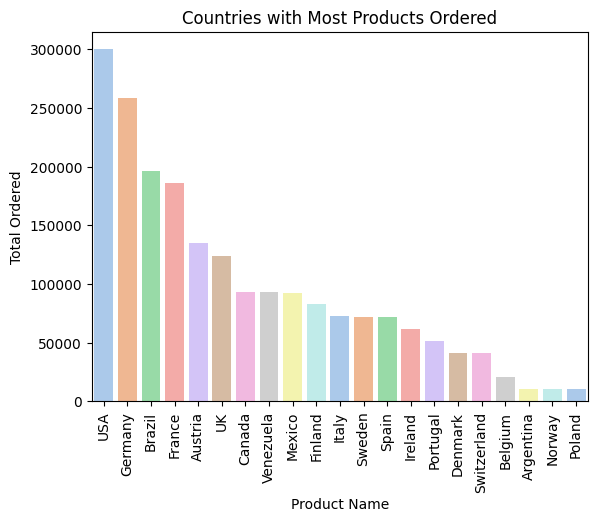

In [163]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rowsss, columns=['Product', 'Count'])

# TODO: Generate a visualization on this dataframe
sns.barplot(data=df, x='Product', y='Count', palette='pastel')
plt.xticks(rotation=90)
plt.title('Countries with Most Products Ordered')
plt.xlabel('Product Name')
plt.ylabel('Total Ordered')
plt.show()

### Question 7 : Countries with Customers Who Do Not Order

Which countries have at least one customer who has placed **no** orders? Count up the total number of customers who have placed no orders for each respective country. For each country, list its' name in your output and visualizations.

**Hint**: A join is necessary. We can also check if a column is `NULL` using the `IS` keyword.

In [147]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT Country, Count(Country) AS total 
    FROM Customers AS C
    LEFT JOIN Orders AS od 
        ON od.CustomerID = C.CustomerID
    WHERE od.OrderID IS NULL
    GROUP BY Country;
""")

# TODO: Fetch your list of tuples and print it out
rowsssS = cursor.fetchall()
print(rowsssS)

[('Argentina', 2), ('Belgium', 1), ('Canada', 1), ('France', 4), ('Germany', 2), ('Spain', 1), ('UK', 1), ('USA', 5)]


/var/folders/gm/fpwr86zs1p96z8j61ggn1ghm0000gn/T/ipykernel_38435/893585290.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Country', y='Count', palette='pastel')


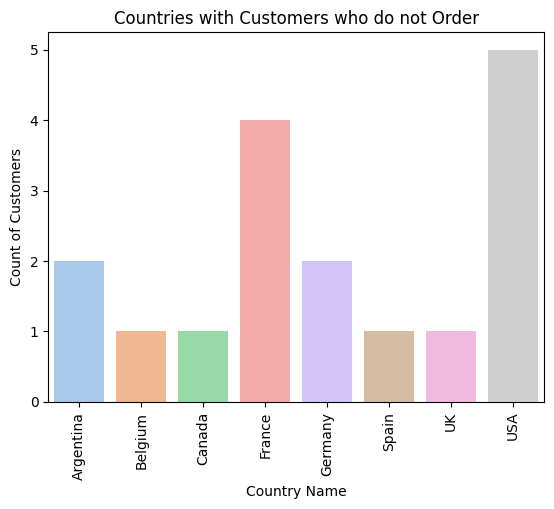

In [164]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rowsssS, columns=['Country', 'Count'])

# TODO: Generate a visualization on this dataframe
sns.barplot(data=df, x='Country', y='Count', palette='pastel')
plt.xticks(rotation=90)
plt.title('Countries with Customers who do not Order')
plt.xlabel('Country Name')
plt.ylabel('Count of Customers')
plt.show()

### Question 8 : Most Popular Suppliers

What are the most popular suppliers according to order count? List the supplier names and their number of orders. Sort your output in descending order.

**Hint**: You might need to use a subquery to join more than 2 tables together.

In [150]:
# TODO: Convert your list of tuples to a dataframe
cursor.execute("""
    SELECT SupplierName, Count(od.OrderID) AS total 
    FROM Suppliers AS S
    LEFT JOIN Products AS P 
        ON S.SupplierID = P.SupplierID
    LEFT JOIN OrderDetails AS od 
        ON od.ProductID = P.ProductID
    GROUP BY SupplierName
    ORDER BY total;
""")

# TODO: Fetch your list of tuples and print it out
rowsssSS = cursor.fetchall()
print(rowsssSS)

[('Escargots Nouveaux', 4), ('Zaanse Snoepfabriek', 4), ("Grandma Kelly's Homestead", 6), ('PB Knäckebröd AB', 6), ('Lyngbysild', 8), ('Nord-Ost-Fisch Handelsgesellschaft mbH', 8), ("Cooperativa de Quesos 'Las Cabras'", 11), ('Refrescos Americanas LTDA', 11), ('Tokyo Traders', 12), ('Svensk Sjöföda AB', 14), ('Aux joyeux ecclésiastiques', 15), ("Forêts d'érables", 15), ('Heli Süßwaren GmbH & Co. KG', 15), ('Bigfoot Breweries', 16), ('Leka Trading', 17), ("Mayumi's", 17), ('New England Seafood Cannery', 17), ("G'day, Mate", 19), ('Karkki Oy', 19), ('Ma Maison', 19), ('New Orleans Cajun Delights', 20), ('Pasta Buttini s.r.l.', 20), ('Exotic Liquid', 21), ('Gai pâturage', 26), ('Formaggi Fortini s.r.l.', 31), ('Norske Meierier', 32), ('Specialty Biscuits, Ltd.', 33), ('Pavlova, Ltd.', 40), ('Plutzer Lebensmittelgroßmärkte AG', 42)]


/var/folders/gm/fpwr86zs1p96z8j61ggn1ghm0000gn/T/ipykernel_38435/1338672376.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Supplier', y='Count', palette='pastel')


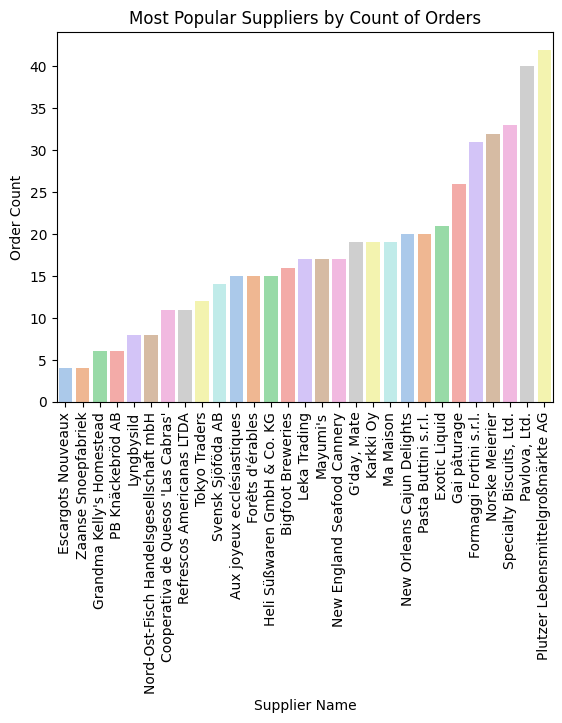

In [165]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rowsssSS, columns=['Supplier', 'Count'])

# TODO: Generate a visualization on this dataframe
sns.barplot(data=df, x='Supplier', y='Count', palette='pastel')
plt.xticks(rotation=90)
plt.title('Most Popular Suppliers by Count of Orders')
plt.xlabel('Supplier Name')
plt.ylabel('Order Count')
plt.show()

## Report

Answer the following analytical questions using numerical evidence.

### Question 1

Which countries have the greatest number of customers? How does this correlate with the number of suppliers by country (i.e. do more customers lead to less or more suppliers)? Which evidence supports your answer?

[Answer Here]

### Question 2

What is the least popular product by order quantity? How does this correlate with revenue (i.e. do less popular products by quantity lead to less or more revenue)? Which evidence supports your answer?

[Answer Here]

### Question 3

Which country has the most orders? How does this correlate with the number of customers who do not order (i.e. do countries with more ordering customers have more or less non-ordering customers)? Which evidence supports your answer?

[Answer Here]

### Question 4

Which supplier has the most orders? Which evidence supports your answer?

[Answer Here]